<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/LinearModels/Example_Linear_Models_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amount Paid = 4.7 + 2.9 * Distance


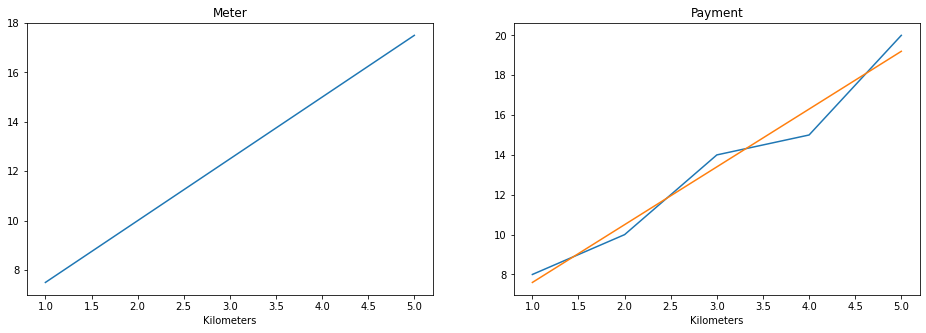

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_taxi = pd.DataFrame([[1,7.5,8],[2,10.0,10],[3,12.5,14],[4,15.0,15],[5,17.5,20]],
                       columns=['Kilometers','Meter','Payment'])
reg = LinearRegression()
reg.fit(df_taxi[['Kilometers']],df_taxi['Payment'])
df_taxi['Payment (Predicted)'] = reg.predict(df_taxi[['Kilometers']])

fig, axs = plt.subplots(1,2,figsize=(16,5))
df_taxi.set_index('Kilometers')['Meter'].plot(
    title='Meter', kind='line', ax=axs[0]
)
df_taxi.set_index('Kilometers')['Payment'].plot(
    title='Payment', label='actual', kind='line', ax=axs[1]
)
df_taxi.set_index('Kilometers')['Payment (Predicted)'].plot(
    title='Payment', label='estimated', kind='line', ax=axs[1]
)
fig.show()

print('Amount Paid = {:.1f} + {:.1f} * Distance'.format(
    reg.intercept_, reg.coef_[0],
  )
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
50%       21.200000
90%       34.800000
95%       43.400000
99%       50.000000
max       50.000000
Name: target, dtype: float64

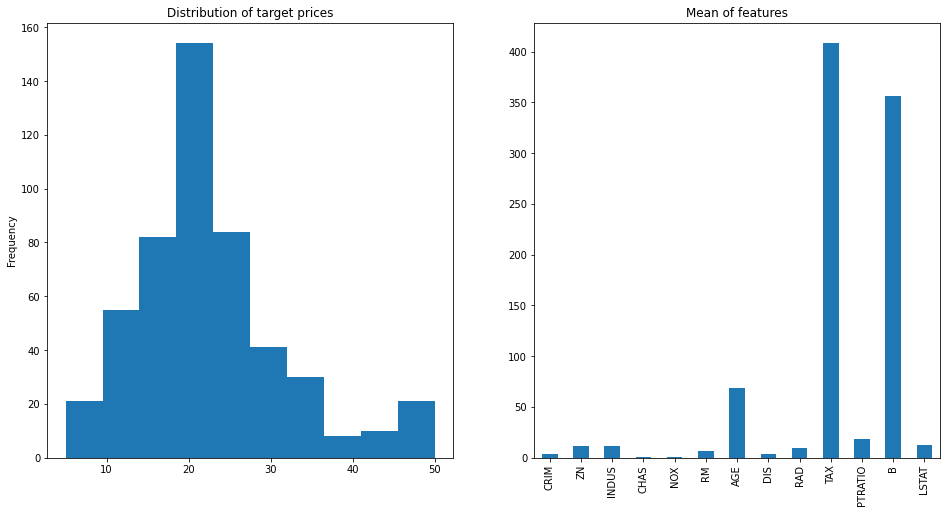

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
df_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
df_dataset['target'] = boston.target

# data exploration
# total number of missing values (cells)
df_dataset.isnull().sum().sum()

fig,axs = plt.subplots(1,2,figsize=(16,8))
df_dataset['target'].plot(title='Distribution of target prices', kind='hist', ax=axs[0])
df_dataset[boston.feature_names].mean().plot(title='Mean of features', kind='bar', ax=axs[1])
fig.show()
df_dataset['target'].describe(percentiles=[.9,.95,.99])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

df_train, df_test = train_test_split(df_dataset, test_size=0.4)
x_train = df_train[boston.feature_names]
y_train = df_train['target']
x_test= df_test[boston.feature_names]
y_test = df_test['target']

# Use the mean of y_train as baseline
baseline = DummyRegressor(strategy='mean')
baseline.fit(x_train,y_train)
y_test_baseline = baseline.predict(x_test)

In [6]:
from sklearn.linear_model import LinearRegression

# train a linear regression model
reg = LinearRegression()
reg.fit(x_train,y_train)
y_test_pred = reg.predict(x_test)

In [7]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# evaluate the model with three metrics
print('R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
    r2_score(y_test,y_test_pred),
    r2_score(y_test,y_test_baseline)
))
print('MAE regressor = {:.2f} vs Baseline = {:.2f}'.format(
    mean_absolute_error(y_test,y_test_pred),
    mean_absolute_error(y_test,y_test_baseline)
))
print('MSE regressor = {:.2f} vs Baseline = {:.2f}'.format(
    mean_squared_error(y_test,y_test_pred),
    mean_squared_error(y_test,y_test_baseline)
))

R2 regressor = 0.76 vs Baseline = -0.00
MAE regressor = 3.31 vs Baseline = 7.07
MSE regressor = 23.32 vs Baseline = 96.37


In [8]:
df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_)
    }
).set_index('Features').sort_values('Coeff', ascending=False)
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,3.684659,3.684659
CHAS,1.984460,1.984460
RAD,0.214868,0.214868
INDUS,0.052043,0.052043
ZN,0.040426,0.040426
AGE,0.012046,0.012046
B,0.010517,0.010517
TAX,-0.008583,0.008583
CRIM,-0.086829,0.086829


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()
# scaler.fit(x_train)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
reg.fit(x_train_scaled,y_train)
y_test_pred = reg.predict(x_test_scaled)

df_feature_importance = pd.DataFrame(
    {
        'Features': x_train.columns,
        'Coeff': reg.coef_,
        'ABS(Coeff)': abs(reg.coef_)
    }
).set_index('Features').sort_values('Coeff', ascending=False)
df_feature_importance

,Coeff,ABS(Coeff)
Features,,
RM,18.117470,18.117470
RAD,4.941973,4.941973
B,4.170983,4.170983
ZN,3.840490,3.840490
CHAS,1.984460,1.984460
INDUS,1.405166,1.405166
AGE,1.132363,1.132363
TAX,-4.488897,4.488897
CRIM,-7.725210,7.725210


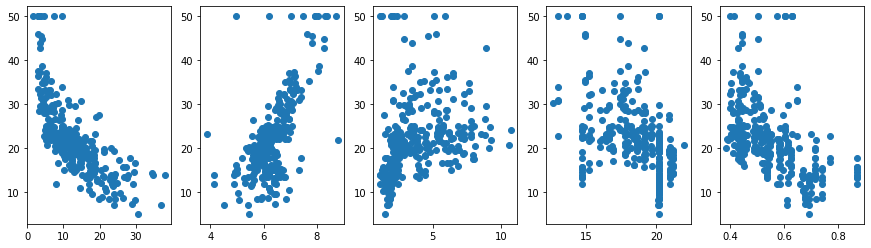

In [10]:
fig,axs = plt.subplots(1,5,figsize=(15,4))
axs[0].scatter(x_train['LSTAT'],y_train)
axs[1].scatter(x_train['RM'],y_train)
axs[2].scatter(x_train['DIS'],y_train)
axs[3].scatter(x_train['PTRATIO'],y_train)
axs[4].scatter(x_train['NOX'],y_train)
fig.show()

In [ ]:
# explore quadratically and cubically transformed features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

feature_translator = [(f'x{i}',feature) for i, feature in enumerate(x_train.columns,0)]

def translate_feature_names(s):
  for key, val in feature_translator:
    s = s.replace(key,val)
  return s

poly_features = [translate_feature_names(f) for f in poly.get_feature_names_out()]

x_train_poly = pd.DataFrame(x_train_poly, columns=poly_features)
x_test_poly = pd.DataFrame(x_test_poly, columns=poly_features)

reg = LinearRegression(fit_intercept=False)
reg.fit(x_train_poly, y_train)
y_test_pred = reg.predict(x_test_poly)
# evaluate the model with three metrics
# model is much worse due to multi-collinearity
print('R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
    r2_score(y_test,y_test_pred),
    r2_score(y_test,y_test_baseline)
))
print('MAE regressor = {:.2f} vs Baseline = {:.2f}'.format(
    mean_absolute_error(y_test,y_test_pred),
    mean_absolute_error(y_test,y_test_baseline)
))
print('MSE regressor = {:.2f} vs Baseline = {:.2f}'.format(
    mean_squared_error(y_test,y_test_pred),
    mean_squared_error(y_test,y_test_baseline)
))

R2 regressor = -225.23 vs Baseline = -0.00
MAE regressor = 57.81 vs Baseline = 7.00
MSE regressor = 20374.08 vs Baseline = 90.06


In [ ]:
# Regularizing the regressor
# Lasso uses a form of regularization called L1, which penalizes the absolute
# values of the coefficients, while ridge uses L2, which penalizes the squared 
# values of the coefficients.

from sklearn.linear_model import Ridge, Lasso

reg = Lasso(fit_intercept=False)
reg.fit(x_train_poly,y_train)
y_test_pred = reg.predict(x_test_poly)

print('R2 regressor = {:.2f} vs Baseline = {:.2f}'.format(
    r2_score(y_test,y_test_pred),
    r2_score(y_test,y_test_baseline)
))
print('MAE regressor = {:.2f} vs Baseline = {:.2f}'.format(
    mean_absolute_error(y_test,y_test_pred),
    mean_absolute_error(y_test,y_test_baseline)
))
print('MSE regressor = {:.2f} vs Baseline = {:.2f}'.format(
    mean_squared_error(y_test,y_test_pred),
    mean_squared_error(y_test,y_test_baseline)
))

R2 regressor = 0.80 vs Baseline = -0.00
MAE regressor = 2.66 vs Baseline = 7.00
MSE regressor = 17.62 vs Baseline = 90.06


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.887e+02, tolerance: 1.781e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
# Find optimal regularization parameter
import numpy as np
from sklearn.linear_model import LassoCV

# Make a list of 50 values between 0.000001 & 1,000,000
alphas = np.logspace(-6,6,50)

# Do 5-fold cross validation
reg = LassoCV(alphas=alphas, fit_intercept=False, cv=5)
reg.fit(x_train_poly, y_train)

y_train_pred = reg.predict(x_train_poly)
y_test_pred = reg.predict(x_test_poly)

print(f"LassoCV: Chosen alpha = {reg.alpha_}")

Text(0, 0.5, 'Mean Squared Error')

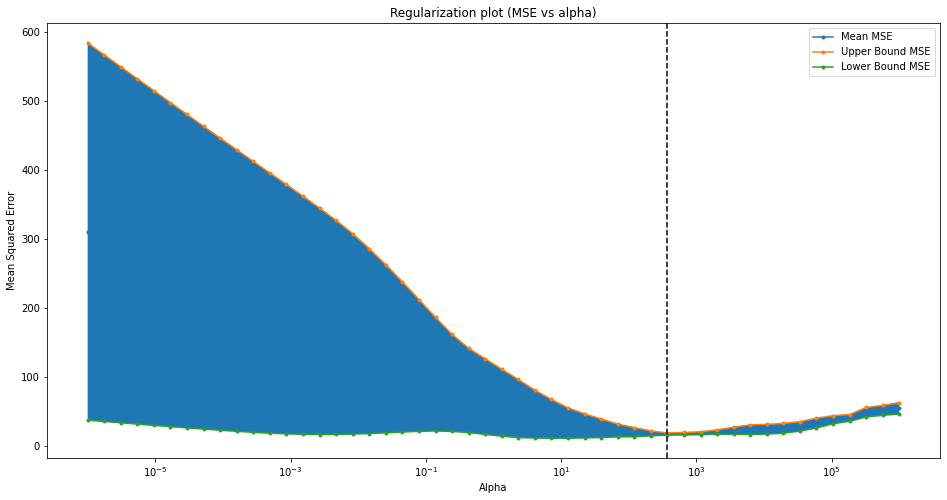

In [ ]:
# n_folds equals to 5 here
n_folds = reg.mse_path_.shape[1]
# Calculate the mean and standard error for MSEs
mse_mean = reg.mse_path_.mean(axis=1)
mse_std = reg.mse_path_.std(axis=1)
# Std Error = Std Deviation / SQRT(number of samples)
mse_std_error = mse_std / np.sqrt(n_folds)

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
# We multiply by 1.96 for a 95% Confidence Interval
pd.DataFrame(
{
'alpha': reg.alphas_,
'Mean MSE': mse_mean,
'Upper Bound MSE': mse_mean + 1.96 * mse_std_error,
'Lower Bound MSE': mse_mean - 1.96 * mse_std_error,
}
).set_index('alpha')[
['Mean MSE', 'Upper Bound MSE', 'Lower Bound MSE']
].plot(
title='Regularization plot (MSE vs alpha)',
marker='.', logx=True, ax=ax
)
# Color the confidence interval
plt.fill_between(
reg.alphas_,
mse_mean + 1.96 * mse_std_error,
mse_mean - 1.96 * mse_std_error,
)
# Print a vertical line for the chosen alpha
ax.axvline(reg.alpha_, linestyle='--', color='k')
ax.set_xlabel('Alpha')
ax.set_ylabel('Mean Squared Error')

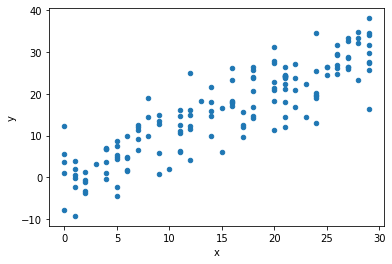

In [ ]:
df_noisy = pd.DataFrame(
    {
        'x': np.random.randint(0,30,size=150),
        'noise': np.random.normal(loc=0.0, scale=5.0, size=150)
    }
)
df_noisy['y'] = df_noisy['x'] + df_noisy['noise']
df_noisy.plot(kind='scatter', x='x', y='y')

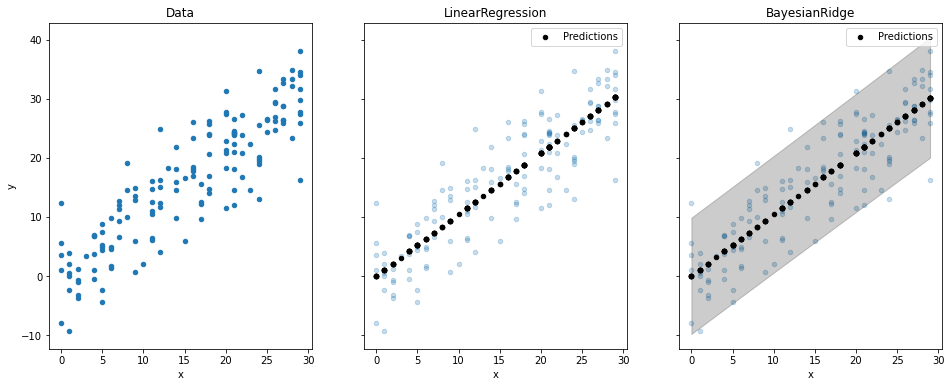

In [ ]:
from sklearn.linear_model import BayesianRidge

lr = LinearRegression()
br = BayesianRidge()

lr.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_lr_pred'] = lr.predict(df_noisy[['x']])

br.fit(df_noisy[['x']], df_noisy['y'])
df_noisy['y_br_pred'], df_noisy['y_br_std'] = br.predict(df_noisy[['x']],return_std=True)

fig,axs = plt.subplots(1,3,figsize=(16,6), sharex=True, sharey=True)

df_noisy.sort_values('x').plot(title='Data',kind='scatter',x='x',y='y',ax=axs[0])
df_noisy.sort_values('x').plot(kind='scatter',x='x',y='y',ax=axs[1],marker='o',alpha=0.25)
df_noisy.sort_values('x').plot(kind='scatter',x='x',y='y',ax=axs[2],marker='o',alpha=0.25)

df_noisy.sort_values('x').plot(title='LinearRegression',kind='scatter',x='x',y='y_lr_pred',
                               ax=axs[1], marker='o', color='k', label='Predictions')
df_noisy.sort_values('x').plot(title='BayesianRidge',kind='scatter',x='x',y='y_br_pred',
                               ax=axs[2], marker='o', color='k', label='Predictions')

axs[2].fill_between(df_noisy.sort_values('x')['x'],
                    df_noisy.sort_values('x')['y_br_pred'] - 1.96*df_noisy.sort_values('x')['y_br_std'],
                    df_noisy.sort_values('x')['y_br_pred'] + 1.96*df_noisy.sort_values('x')['y_br_std'],
                    color='k',alpha=0.2,label='Predictions +/- 1.96 * Std Dev'
                    )
fig.show()

In [ ]:
# visual of sigmoid function y = 1/(1+exp(-x))
import numpy as np
import pandas as pd

fig,ax = plt.subplots(1,1,figsize=(16,8))
x = np.arange(-10,10,0.05)
y = 1/(1+np.exp(-x))

pd.DataFrame({
    'x': x,
    'y': y,
}).plot(
    title='Logistic Function',
    kind='scatter', x='x', y='y', ax=ax
)
fig.show()

In [14]:
# Logistic regression for the Iris dataset
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = pd.Series(iris.target)

num_folds = 6
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
accuracy_scores = cross_validate(clf, df[iris.feature_names], df['target'],
                                 cv=num_folds, scoring=['accuracy'])
accuracy_mean = pd.Series(accuracy_scores['test_accuracy']).mean()
accuracy_std = pd.Series(accuracy_scores['test_accuracy']).std()
accuracy_sterror = accuracy_std/np.sqrt(num_folds)

print('Logistic Regression: Accuracy ({}-fold): {:.2f} ~ {:.2f}'.format(
    num_folds, 
    (accuracy_mean - 1.96*accuracy_sterror),
    (accuracy_mean + 1.96*accuracy_sterror)
))



Logistic Regression: Accuracy (6-fold): 0.94 ~ 0.99


In [15]:
# fit model one more time to get coefficients
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[iris.feature_names])

clf.fit(df_scaled,df['target'])

df_coef = pd.DataFrame({
    f'Coef [Class {class_id}]': clf.coef_[class_id]
    for class_id in range(clf.coef_.shape[0])
}, index=iris.feature_names
)
df_coef.loc['intercept',:] = clf.intercept_

df_coef

,Coef [Class 0],Coef [Class 1],Coef [Class 2]
sepal length (cm),-1.404926,0.261358,1.143569
sepal width (cm),1.560021,-1.437230,-0.122791
petal length (cm),-2.860633,0.418396,2.442238
petal width (cm),-2.787136,-0.478438,3.265574
intercept,2.203698,1.229151,-3.432848


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


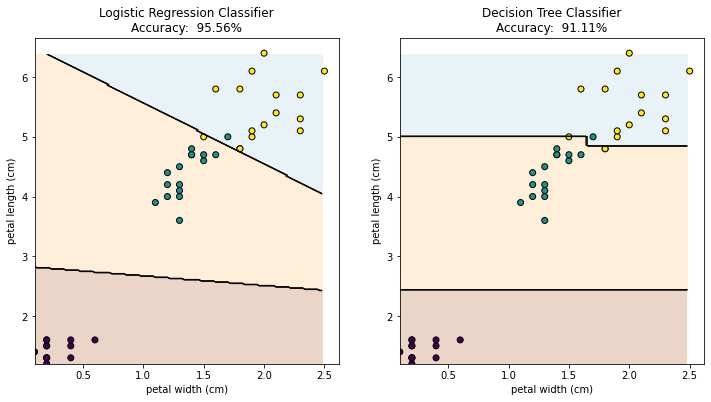

In [19]:
# Explore decision boundaries of linear models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

def plot_decision_boundary(clf, x, y, ax, title):
  cmap = 'Paired_r'
  feature_names = x.columns
  x, y = x.values, y.values

  x_min, x_max = x[:,0].min(), x[:,0].max()
  y_min, y_max = x[:,1].min(), x[:,1].max()

  step = 0.02

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                       np.arange(y_min, y_max, step))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
  ax.contour(xx, yy, Z, colors='k', linewidths=0.7)
  ax.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
  ax.set_title(title)
  ax.set_xlabel(feature_names[0])
  ax.set_ylabel(feature_names[1])

df_train, df_test = train_test_split(df, test_size=0.3, random_state=22)

# compare the decision boundaries of logistic regression and decision trees
fig, axs = plt.subplots(1,2,figsize=(12,6))
two_features = ['petal width (cm)', 'petal length (cm)']

clf_lr = LogisticRegression()
clf_lr.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(df_test['target'], clf_lr.predict(df_test[two_features]))
plot_decision_boundary(clf_lr, df_test[two_features], df_test['target'],
                       ax=axs[0], 
                       title=f'Logistic Regression Classifier\nAccuracy: {accuracy: .2%}')

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(df_train[two_features], df_train['target'])
accuracy = accuracy_score(df_test['target'], clf_dt.predict(df_test[two_features]))
plot_decision_boundary(clf_dt, df_test[two_features], df_test['target'],
                       ax=axs[1], 
                       title=f'Decision Tree Classifier\nAccuracy: {accuracy: .2%}')

fig.show()